<a href="https://colab.research.google.com/github/deeparanideepa/Deeparani/blob/main/Data_Visualization_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

titanic_filepath = "/content/data.csv"

In [2]:
titanic = pd.read_csv(titanic_filepath)

In [3]:
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
import seaborn as sns
sns.set(style="white",color_codes=True)

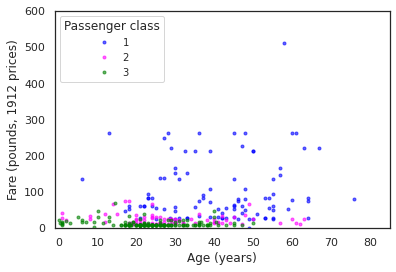

In [5]:
titanic_pclass_fig, titanic_pclass_ax = plt.subplots()

color = ['blue', 'magenta', 'green']


count = 0
for name, group in titanic.groupby('Pclass'):
    titanic_pclass_ax.plot(group.Age, group.Fare, '.', 
                           label = name, alpha = 0.6, 
                           c = color[count])
    count += 1


titanic_pclass_ax.legend(numpoints=1, title = "Passenger class", fontsize = 10)


plt.xlabel('Age (years)')
plt.ylabel('Fare (pounds, 1912 prices)')
titanic_pclass_ax.set_xlim(-1, 85)
titanic_pclass_ax.set_ylim(-1, 600)

plt.show(titanic_pclass_fig)

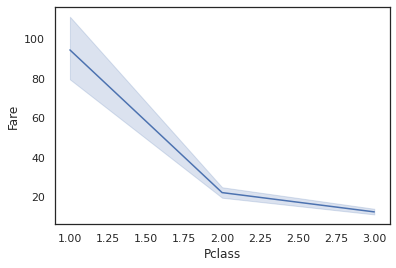

In [6]:
sns.lineplot(x="Pclass",y="Fare",data=titanic)
plt.show()


In [7]:
import seaborn as sns
sns.set(style="white",color_codes=True)

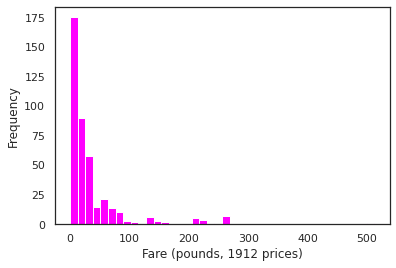

In [8]:
titanic_hist = titanic.Fare.plot.hist(bins = 40, color = 'magenta')
plt.xlabel('Fare (pounds, 1912 prices)')

plt.show(titanic_hist)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


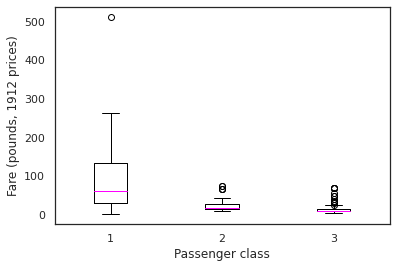

In [9]:
pclass_fare_titanic = titanic[['Pclass', 'Fare']].pivot(columns = 'Pclass', values = 'Fare')

box_color = dict(boxes = 'black', 
             whiskers = 'black', 
             medians = 'magenta', 
             caps = 'black')

titanic_pclass_boxplot = pclass_fare_titanic.plot.box(color = box_color)
plt.xlabel('Passenger class')
plt.ylabel('Fare (pounds, 1912 prices)')

plt.show(titanic_pclass_boxplot)

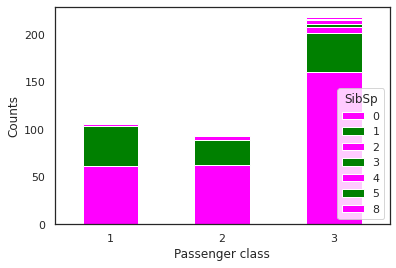

In [10]:
# bar plot
contingency_titanic = titanic.groupby(['Pclass', 'SibSp']).size().unstack()
titanic_barplot = contingency_titanic.plot.bar(stacked=True, 
                                               color = ["magenta", "green"])
plt.ylabel("Counts")
plt.xlabel('Passenger class')
plt.xticks(rotation=0)
plt.show(titanic_barplot)